# Model Prototyping
Geoff Pidcock | PacifImpact | Sept 2020

## Scope
- Replication of a Nowcasting example
- Application of models to our data
- Review prior examples of "Nowcasting"
  - what algorithms
  - how were they evaluated
  - were there any gold standards

# Replication
Nowcasting SG GDP using other economic indicators - Jason Yip - [link](https://github.com/jasonyip184/nowcast)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle
from matplotlib import rcParams

In [3]:
mdf = pd.read_csv('../data/external/data_m_original - Copy.csv').set_index('Indicator').T
mdf.index = [str(pd.Timestamp(x))[:7] for x in list(mdf.index)]
qdf = pd.read_csv('../data/external/data_q_original - Copy.csv').set_index('Indicator').T

display(mdf.head(),qdf.head())

Indicator,Total Merchandise Exports_ln2,Total Merchandise Imports_ln2,Retail Sales Index_ln1,Index Of Industrial Production_ln1,Consumer Price Index (CPI),Export Price Index_ln2,Import Price Index_ln2,Singapore Manufactured Products Price Index_ln2,International Visitor Arrivals_ln2,Govt 1-year Treasury Bills Yield_1,Govt 5-year Bond Yield_1,M3_ln2,M2_ln2,M1_ln2,Loans & Advances Of Banks Including Bills Financing_ln2,Total Official Foreign Reserves_ln2,"Building, Real Estate, Construction and Housing Contracts Awarded_ln1",Electricity Generation_ln1,Cessation Of Business Entities_ln1
1995-01,12311698.0,12244388.0,57.521,27.068,0.2,150.342,109.666,134.912,575652.0,1.60,4.01,127045.3,95228.0,25164.6,93429.4,85361.8,1349.1,1739.8,2519.0
1995-02,11560924.0,12396938.0,38.141,25.899,0.1,149.563,109.698,135.269,556744.0,1.53,3.91,126732.0,94617.5,23334.1,94735.4,85292.8,1108.8,1543.6,1702.0
1995-03,14104207.0,14664247.0,46.821,34.597,-0.3,148.269,109.320,134.753,619688.0,1.10,3.29,126759.3,94669.8,23834.6,96587.1,87141.7,1703.2,1837.2,1988.0
1995-04,12650418.0,13734522.0,42.098,27.846,0.5,147.518,109.416,132.544,548881.0,0.65,2.82,127798.2,95750.1,24375.8,98407.4,89906.9,1618.2,1800.7,1844.0
1995-05,13777818.0,14922431.0,44.176,28.949,0.4,147.152,109.124,131.934,535270.0,0.65,2.45,129929.4,97489.8,26045.4,100303.8,91544.1,1555.2,1913.4,1328.0


Indicator,Real GDP Growth Rate,Domestic Wholesale Trade Index_ln1,Foreign Wholesale Trade Index_ln1,Unit Labour Cost Of Overall Economy_ln1,Real Value Added Per Worker,Total Unemployment Rate_1,Real Gross Fixed Capital Formation_ln2,Total Government Debt_ln2,Business Expectations Of Manufacturing Sector (Next 6 Months)_1,Business Expectations Of Services Sector (Next 6 Months)_1
1995 1Q,-0.154247,63.3,30.9,91.3,0.9,1.5,9658.7,79106.1,89.0,70.0
1995 2Q,0.184993,66.9,31.8,83.1,2.8,2.5,10104.5,82029.9,78.0,75.0
1995 3Q,0.294544,71.7,35.1,82.2,3.2,1.2,10879.3,84246.1,76.0,87.0
1995 4Q,0.040952,76.9,38.3,95.9,1.5,1.8,12689.6,86507.6,76.0,66.0
1996 1Q,-0.020491,65.9,36.7,90.4,5.0,1.5,12735.9,90584.8,80.0,59.0


- Essentially we have a bunch of monthly, and quarterly, indicators.
- We want to join these into one data source
- We also want to carry out a set of data transforms

In [4]:
# what a weird way to do the following data prep steps
for col in mdf.columns:
    if col[-2:] == '_1':
        mdf[col] = mdf[col].diff() # calculating difference based on previous row
    elif col[-2:] == 'n1':
        mdf[col] = np.log(mdf[col]).diff() # taking the log and then diff
    elif col[-2:] == 'n2':
        mdf[col] = np.log(mdf[col]).diff().diff() # differences between differences - second order derivative?

for col in qdf.columns[1:]:
    if col[-2:] == '_1':
        qdf[col] = qdf[col].diff()
    elif col[-2:] == 'n1':
        qdf[col] = np.log(qdf[col]).diff()
    elif col[-2:] == 'n2':
        qdf[col] = np.log(qdf[col]).diff().diff()

# applying a quarterly transform
def f(date):
    end = None
    if date[-2] == '1':
        end = '-03'
    if date[-2] == '2':
        end = '-06'
    if date[-2] == '3':
        end = '-09'
    if date[-2] == '4':
        end = '-12'
    return date[:4]+end
qdf.index = [f(x) for x in list(qdf.index)]

start = qdf.index[2]
df = pd.concat([qdf,mdf],axis=1,join='outer')

# downsampling index
df.index = pd.DatetimeIndex(df.index).to_period('M')
df.sort_index(inplace=True)
df = df.loc[start:]

# standardization
for col in df.columns[1:]:
    df[col] = (df[col]-df[col].mean())/df[col].std()
df

Indicator,Real GDP Growth Rate,Domestic Wholesale Trade Index_ln1,Foreign Wholesale Trade Index_ln1,Unit Labour Cost Of Overall Economy_ln1,Real Value Added Per Worker,Total Unemployment Rate_1,Real Gross Fixed Capital Formation_ln2,Total Government Debt_ln2,Business Expectations Of Manufacturing Sector (Next 6 Months)_1,Business Expectations Of Services Sector (Next 6 Months)_1,...,Govt 1-year Treasury Bills Yield_1,Govt 5-year Bond Yield_1,M3_ln2,M2_ln2,M1_ln2,Loans & Advances Of Banks Including Bills Financing_ln2,Total Official Foreign Reserves_ln2,"Building, Real Estate, Construction and Housing Contracts Awarded_ln1",Electricity Generation_ln1,Cessation Of Business Entities_ln1
1995-09,0.294544,1.001712,1.933425,-0.157973,0.282142,-1.506592,0.266892,-0.476540,-0.076332,0.848618,...,-0.146742,-0.487283,-0.490275,-0.305282,-0.143197,-0.535973,-0.216490,-0.206744,0.015587,3.243134
1995-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.576117,-0.439950,-0.335442,-0.329656,-0.461575,-0.314717,0.376119,0.083828,0.006107,-2.973032
1995-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.204565,-0.108624,1.465294,1.044778,0.186186,0.643759,-0.152949,1.089610,-0.589172,-0.466868
1995-12,0.040952,1.012751,1.676915,1.777748,-0.080550,0.698777,0.736335,-0.012540,0.048575,-1.346501,...,-0.732254,-0.345286,-0.001283,-0.115832,1.252406,-0.418847,-0.164477,-0.355863,-0.119867,3.855168
1996-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.477804,-0.013959,-1.971780,-1.030119,-0.019212,0.566557,0.506619,-0.869993,0.389387,-2.472286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.107708,-0.061291,0.626896,0.390298,0.578777,-0.188896,0.074665,-0.102871,-0.604177,-0.048778
2019-12,0.030943,-0.071691,1.182544,0.964404,-0.528581,0.002345,0.285235,-1.309271,1.110290,-0.149163,...,0.321668,-0.250621,-0.844891,-0.541638,-1.322031,-0.423244,-0.359556,0.089687,-0.028506,-0.053702
2020-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.888391,-0.534615,1.353350,0.872952,1.133359,-0.102350,0.937415,-0.547527,NaN,0.024218
2020-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.165531,-0.723944,-0.677846,-0.435237,-0.172965,0.349686,1.481957,-0.453524,NaN,-0.165882


In [5]:
# # Create the model
mod = sm.tsa.DynamicFactor(df, k_factors=1, factor_order=2, error_order=2)
res = mod.fit(disp=False)

# may have failed to converge :/

/anaconda3/envs/ais-hack/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
type(res)

statsmodels.tsa.statespace.dynamic_factor.DynamicFactorResultsWrapper

In [8]:
resultdf = pd.DataFrame({'Nowcasted Real GDP Growth':res.predict()['Real GDP Growth Rate'],'Actual Real GDP Growth':df['Real GDP Growth Rate']})
resultdf

,Nowcasted Real GDP Growth,Actual Real GDP Growth
1995-09,0.000000,0.294544
1995-10,0.094812,NaN
1995-11,0.226676,NaN
1995-12,0.116172,0.040952
1996-01,0.117957,NaN
...,...,...
2019-11,0.058119,NaN
2019-12,-0.003700,0.030943
2020-01,0.019502,NaN
2020-02,0.017897,NaN


<AxesSubplot:>

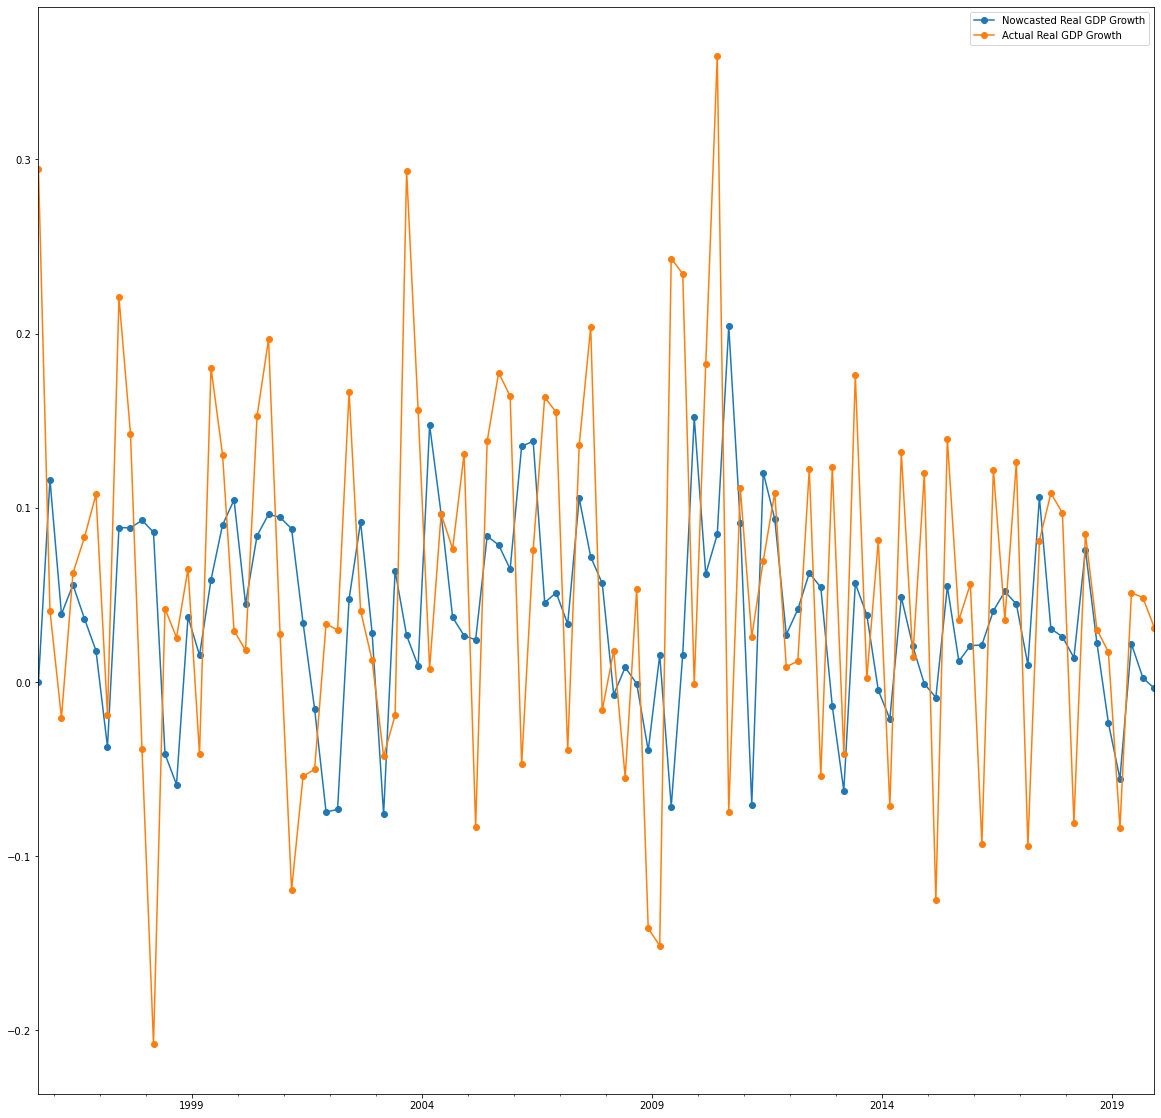

In [9]:
resultdf.dropna().plot(marker='o',linestyle='-',figsize=(20,20))

<AxesSubplot:>

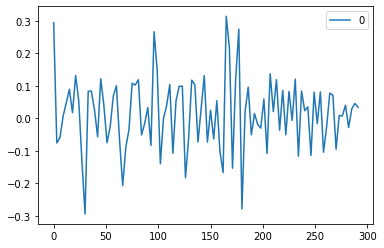

In [10]:
pd.DataFrame(res.filter_results.forecasts_error[0]).dropna().plot()

In [11]:
resultdf = pd.DataFrame({'Nowcasted Real GDP Growth':res.filter_results.smoothed_forecasts[0],'Actual Real GDP Growth':df['Real GDP Growth Rate']})*100
resultdf

,Nowcasted Real GDP Growth,Actual Real GDP Growth
1995-09,29.454377,29.454377
1995-10,0.804134,NaN
1995-11,19.658772,NaN
1995-12,4.095188,4.095188
1996-01,12.482527,NaN
...,...,...
2019-11,6.116524,NaN
2019-12,3.094270,3.094270
2020-01,-1.059995,NaN
2020-02,5.663710,NaN


#### This is how they evaluate performance

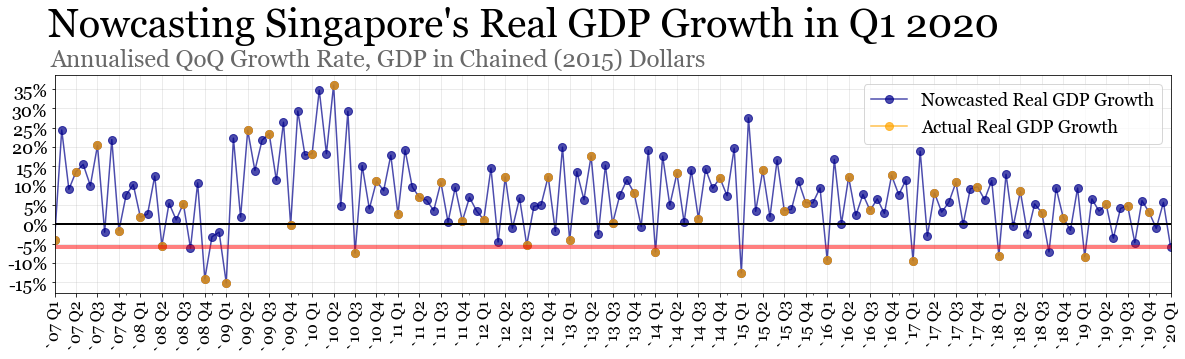

In [12]:
plotdf = resultdf.iloc[-157:]
def f(date):
    end = ''
    if date[-1] == '3':
        end = ' Q1'
    if date[-1] == '6':
        end = ' Q2'
    if date[-1] == '9':
        end = ' Q3'
    if date[-2:] == '12':
        end = ' Q4'
    return "`"+date[2:4]+end
plotdf_labels = [f(str(x)) for x in list(plotdf.index)]
rcParams['font.family'] = 'Georgia'
ax = plotdf.plot(marker='o',linestyle='-',figsize=(20,4),alpha=0.7,color=['darkblue','orange'],markersize=8)
ax.set_yticks(np.arange(-15, 40, 5))
ax.set_yticklabels([str(x)+'%' for x in np.arange(-15, 40, 5)],fontsize=18)
ax.set_xticks(plotdf.index[::3])
ax.set_xticklabels(plotdf_labels[::3], rotation=90,fontsize=16)
ax.grid('on', alpha=0.3)
ax.axhline(y=plotdf['Nowcasted Real GDP Growth'][-1],alpha=0.5,linewidth=4,color='red');
ax.axhline(y=0,alpha=1,linewidth=2,color='black');
ax.legend(prop={'size':18});
ax.set_title('Nowcasting Singapore\'s Real GDP Growth in Q1 2020',fontsize=40,y=1.15,x=0.42);
plt.suptitle("Annualised QoQ Growth Rate, GDP in Chained (2015) Dollars",fontsize=24,y=0.975,x=0.35,color='dimgrey');
# plt.savefig('myimage.png', format='png', dpi=1200)

#### This plot isn't a bad thought on how to show changes - maybe YoY, or "pre-COVID"

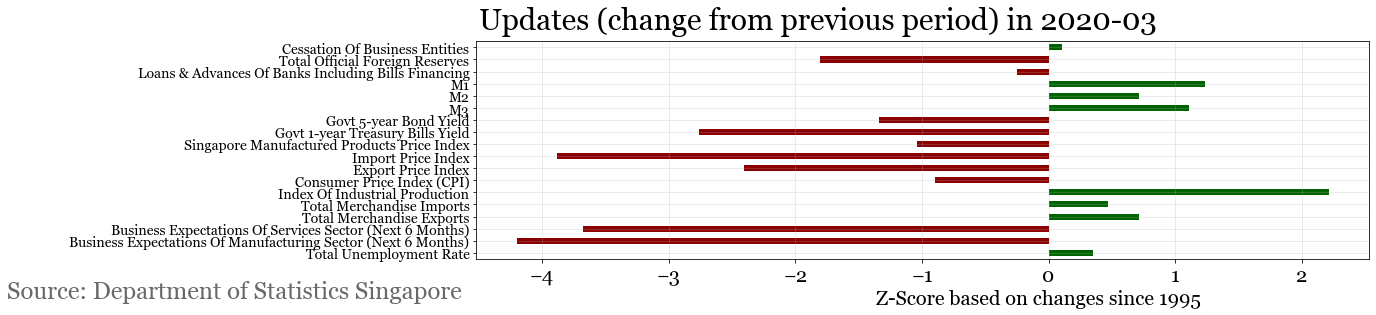

In [13]:
news = list(df.iloc[-1][df.iloc[-1].notnull()].index)
plotdf = pd.DataFrame(df[news].iloc[-1])
plotdf.columns = ['Values']
plotdf.index = [x.split('_')[0] for x in plotdf.index]
plotdf['positive'] = plotdf['Values'] > 0
ax = plotdf['Values'].plot(kind='barh',figsize=(16,4),fontsize=20,color=plotdf.positive.map({True:'darkgreen',False:'darkred'}))
ax.set_yticklabels(plotdf.index,fontsize=14)
ax.grid('on', alpha=0.3)
ax.axes.get_yaxis().get_label().set_visible(False)
ax.axes.set_xlabel('Z-Score based on changes since 1995',fontsize=20,x=0.63)
plt.text(-4.5,18.5,'Updates (change from previous period) in {}'.format(str(df.index[-1])),fontsize=30);
plt.suptitle("Source: Department of Statistics Singapore",fontsize=24,y=0.05,x=-0.085,color='dimgrey');

Discussion
- we don't have 25 years of quarterly data to work with here - we may have at most 12 months, and 4 quarters.
- the model failed to converge for the author and for myself - and as we lack expertise, it may be harder to debug further.

# Application
- Get GDP or Trade indicators
- Get port visit index (the numbers behind the AIS dashboard, calculated using this [method](https://comtrade.un.org/data/cache/AISdashboardMethodology.pdf)

In [14]:
# Setup
import os
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

DBUNAME = os.environ.get("DBUNAME")
DBPASSWORD = os.environ.get("DBPASSWORD")
DBHOST = os.environ.get("DBHOST")
DBPORT = os.environ.get("DBPORT")
DBNAME = os.environ.get("DBNAME")

import sqlalchemy
import psycopg2

connection_str = 'postgresql+psycopg2://'+DBUNAME+':'+DBPASSWORD+'@'+DBHOST+':'+DBPORT+'/'+DBNAME

In [86]:
try:
    engine = sqlalchemy.create_engine(connection_str)
    conn = engine.connect()
except:
    print('Database connection error - check creds')

In [87]:
# confirm tables are present as expected
engine.table_names() 

['test', 'test2', 'stg_country_metrics', 'country_metrics', 'stg_ais']

In [17]:
pd.read_sql("""
select *
from public.country_metrics
limit 5
""",con=engine)

,metric_key,frequency,country,category,source,name,date,value,properties
0,CPI_2006_ALL ITEMS_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_ALL ITEMS,2018-01-01,130.3,none
1,CPI_2006_FOOD_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_FOOD,2018-01-01,129.6,none
2,CPI_2006_NON-ALCOHOLIC DRINKS_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_NON-ALCOHOLIC DRINKS,2018-01-01,163.4,none
3,CPI_2006_ALCOHOL/TOBACCO_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_ALCOHOL/TOBACCO,2018-01-01,147.3,none
4,CPI_2006_CLOTHING_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_CLOTHING,2018-01-01,106.9,none


In [25]:
pd.read_sql("""
select *
from public.country_metrics
limit 5
""",con=engine,parse_dates=['date'],coerce_float=True)

,metric_key,frequency,country,category,source,name,date,value,properties
0,CPI_2006_ALL ITEMS_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_ALL ITEMS,2018-01-01,130.3,none
1,CPI_2006_FOOD_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_FOOD,2018-01-01,129.6,none
2,CPI_2006_NON-ALCOHOLIC DRINKS_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_NON-ALCOHOLIC DRINKS,2018-01-01,163.4,none
3,CPI_2006_ALCOHOL/TOBACCO_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_ALCOHOL/TOBACCO,2018-01-01,147.3,none
4,CPI_2006_CLOTHING_2018-01-01,monthly,kir,CPI,Official_kiribati,CPI_2006_CLOTHING,2018-01-01,106.9,none


In [21]:
pd.read_sql("""
select distinct country
from public.country_metrics
where category = 'GDP'
""",con=engine)

,country
0,wsm
1,ck


In [22]:
pd.read_sql("""
select name, count(distinct country)
from public.country_metrics
where true
and category = 'GDP'
and country in ('wsm','ck')
group by 1
""",con=engine)

,name,count
0,GDP_Accommodation & Restaurants,1
1,GDP_Accomodation Services,1
2,GDP_Agriculture,2
3,"GDP_Arts, Recreation, Other Services",1
4,GDP_Business Services,1
5,GDP_Commerce,1
6,GDP_Communication,1
7,GDP_Construction,2
8,GDP_Education,1
9,GDP_Electricity and Water,1


### Pivot to trade - GDP data is sparse and difficult to interpret

In [26]:
pd.read_sql("""
select name, count(distinct country)
from public.country_metrics
where true
and category = 'trade'
and country in ('fj','ck','sb')
group by 1
""",con=engine)

,name,count
0,exports-fob-domestic,3
1,exports-fob-reexport,3
2,exports-fob-total,3
3,imports-cif,3
4,trade-balance,3


In [29]:
data_trade = pd.read_sql("""
select *
from public.country_metrics
where true
and category = 'trade'
and country in ('fj','ck','sb')
""",con=engine,parse_dates=['date'])
data_trade['value'] = pd.to_numeric(data_trade['value'],errors='coerce')
data_trade.head()

,metric_key,frequency,country,category,source,name,date,value,properties
0,fj-exports-fob-domestic-2014-01-01,monthly,fj,trade,imts,exports-fob-domestic,2014-01-01,48975.0,{'currency' = 'fjd 000'}
1,fj-exports-fob-domestic-2014-02-01,monthly,fj,trade,imts,exports-fob-domestic,2014-02-01,65365.0,{'currency' = 'fjd 000'}
2,fj-exports-fob-domestic-2014-03-01,monthly,fj,trade,imts,exports-fob-domestic,2014-03-01,60586.0,{'currency' = 'fjd 000'}
3,fj-exports-fob-domestic-2014-04-01,monthly,fj,trade,imts,exports-fob-domestic,2014-04-01,67204.0,{'currency' = 'fjd 000'}
4,fj-exports-fob-domestic-2014-05-01,monthly,fj,trade,imts,exports-fob-domestic,2014-05-01,115355.0,{'currency' = 'fjd 000'}


In [62]:
from pandas.tseries.offsets import MonthEnd

data_trade['date'] = data_trade.date + MonthEnd(1)
data_trade.head()

,metric_key,frequency,country,category,source,name,date,value,properties,date_test
0,fj-exports-fob-domestic-2014-01-01,monthly,fj,trade,imts,exports-fob-domestic,2014-01-31,48975.0,{'currency' = 'fjd 000'},2014-01-31
1,fj-exports-fob-domestic-2014-02-01,monthly,fj,trade,imts,exports-fob-domestic,2014-02-28,65365.0,{'currency' = 'fjd 000'},2014-02-28
2,fj-exports-fob-domestic-2014-03-01,monthly,fj,trade,imts,exports-fob-domestic,2014-03-31,60586.0,{'currency' = 'fjd 000'},2014-03-31
3,fj-exports-fob-domestic-2014-04-01,monthly,fj,trade,imts,exports-fob-domestic,2014-04-30,67204.0,{'currency' = 'fjd 000'},2014-04-30
4,fj-exports-fob-domestic-2014-05-01,monthly,fj,trade,imts,exports-fob-domestic,2014-05-31,115355.0,{'currency' = 'fjd 000'},2014-05-31


In [63]:
data_trade_prep = pd.pivot_table(data_trade
                                   ,values='value'
                                   ,index=['date','country']
                                   ,columns='name'
                                   ,aggfunc='mean')
data_trade_prep.columns.name = None
data_trade_prep.head()

,,exports-fob-domestic,exports-fob-reexport,exports-fob-total,imports-cif,trade-balance
date,country,,,,,
2014-01-31,fj,48975.0,75949.0,124924.0,366592.0,-241668.0
2014-02-28,fj,65365.0,69844.0,135209.0,303470.0,-168261.0
2014-03-31,fj,60586.0,84929.0,145515.0,343389.0,-197874.0
2014-04-30,fj,67204.0,63355.0,130559.0,363233.0,-232674.0
2014-05-31,fj,115355.0,101169.0,216524.0,368526.0,-152002.0


### Import and Prep Daily Port Calls Data

In [51]:
data_port = pd.read_csv('../data/raw/daily_port_calls.csv')
data_port.head()

,port-name,country,date-entry,vessel_type_UN,port_calls,GID_0,week,year,lat,lon
0,Vostochnyy,NaN,8/21/2020,Container,2,RUS,0,0,42.746279,133.073785
1,Bakar,NaN,8/21/2020,Tanker,1,HRV,0,0,45.283375,14.551819
2,Nynashamn,NaN,8/22/2020,Tanker,2,SWE,0,0,58.919649,17.971076
3,Arhus,NaN,8/21/2020,General cargo,1,DNK,0,0,56.150592,10.225709
4,Mobile,NaN,8/21/2020,Container,1,USA,0,0,30.625182,-88.059242


In [72]:
data_port_prep = data_port.loc[
    data_port['GID_0'].isin(['FJI','COK','SLB'])
    ,['date-entry','GID_0','port-name','port_calls']
].copy()
data_port_prep.head()

,date-entry,GID_0,port-name,port_calls
11,8/21/2020,FJI,Lautoka Harbor,1
609,8/21/2020,SLB,Honiara,0
610,8/21/2020,SLB,Honiara,1
747,8/22/2020,SLB,Port Noro,4
2141,8/21/2020,FJI,Suva Harbor,0


In [77]:
country_map = {
    'FJI':'fj'
    ,'SLB':'sb'
    ,'COK':'ck'
}
data_port_prep['country'] = data_port_prep.GID_0.apply(lambda x: country_map.get(x))
data_port_prep['date-entry'] = pd.to_datetime(data_port_prep['date-entry']
                                             ,format='%m/%d/%Y')
data_port_prep['date'] = data_port_prep['date-entry'] + MonthEnd(1)
data_port_prep.head()

,date-entry,GID_0,port-name,port_calls,country,date
11,2020-08-21,FJI,Lautoka Harbor,1,fj,2020-08-31
609,2020-08-21,SLB,Honiara,0,sb,2020-08-31
610,2020-08-21,SLB,Honiara,1,sb,2020-08-31
747,2020-08-22,SLB,Port Noro,4,sb,2020-08-31
2141,2020-08-21,FJI,Suva Harbor,0,fj,2020-08-31


In [82]:
data_port_prep2 = data_port_prep.groupby(['date','country'],as_index=False)['port_calls'].sum()
data_port_prep2.set_index(['date','country'],inplace=True)
data_port_prep2
# April 2019 and August 2020 are incomplete months

port_calls
date       country            
2019-04-30 ck                2
           fj               54
           sb               46
2019-05-31 ck                3
           fj               55
           sb               78
2019-06-30 ck                2
           fj               57
           sb               65
2019-07-31 ck                3
           fj               64
           sb               57
2019-08-31 ck                5
           fj               57
           sb               46
2019-09-30 ck                2
           fj               58
           sb               54
2019-10-31 ck                3
           fj               65
           sb               49
2019-11-30 ck                3
           fj               64
           sb               58
2019-12-31 ck                3
           fj               61
           sb               60
2020-01-31 ck                2
           fj               69
           sb              101
2020-02-29 ck                2
           fj               62
           sb               57
2020-03-31 ck                1
           fj               60
           sb               52
2020-04-30 ck                2
           fj               58
           sb               57
2020-05-31 ck                3
           fj               49
           sb               80
2020-06-30 ck                1
           fj               42
           sb               82
2020-07-31 ck                1
           fj               60
           sb               61
2020-08-31 ck                1
           fj               43
           sb               46

In [90]:
join = data_port_prep2.join(data_trade_prep,how='left')
join

port_calls  exports-fob-domestic  exports-fob-reexport  \
date       country                                                           
2019-04-30 ck                2              1975.000                 0.000   
           fj               54             78185.370             88507.289   
           sb               46                   NaN                   NaN   
2019-05-31 ck                3              1389.000                 0.000   
           fj               55             88031.360             91061.391   
           sb               78                   NaN                   NaN   
2019-06-30 ck                2               606.000                 0.000   
           fj               57             86218.199             62248.362   
           sb               65                   NaN                   NaN   
2019-07-31 ck                3              5752.000                 0.000   
           fj               64            125761.537             89387.592   
           sb               57                   NaN                   NaN   
2019-08-31 ck                5             10212.000                 0.000   
           fj               57            148770.968             84390.997   
           sb               46                   NaN                   NaN   
2019-09-30 ck                2               198.590                 0.000   
           fj               58            111357.444            116663.665   
           sb               54                   NaN                   NaN   
2019-10-31 ck                3              1351.806                 0.000   
           fj               65            110725.124             83413.149   
           sb               49                   NaN                   NaN   
2019-11-30 ck                3              1608.355                 0.000   
           fj               64            110255.381             70869.419   
           sb               58                   NaN                   NaN   
2019-12-31 ck                3              1424.304                 0.000   
           fj               61             74106.543             71173.247   
           sb               60                   NaN                   NaN   
2020-01-31 ck                2              1163.000                 0.000   
           fj               69             71448.000             74090.000   
           sb              101                   NaN                   NaN   
2020-02-29 ck                2               701.000                 0.000   
           fj               62             90107.000             53918.000   
           sb               57                   NaN                   NaN   
2020-03-31 ck                1              7429.000                 0.000   
           fj               60             75018.000             68943.000   
           sb               52                   NaN                   NaN   
2020-04-30 ck                2               226.000                 0.000   
           fj               58             74584.000             35557.000   
           sb               57                   NaN                   NaN   
2020-05-31 ck                3                   NaN                   NaN   
           fj               49            100119.000             56203.000   
           sb               80                   NaN                   NaN   
2020-06-30 ck                1                   NaN                   NaN   
           fj               42                   NaN                   NaN   
           sb               82                   NaN                   NaN   
2020-07-31 ck                1                   NaN                   NaN   
           fj               60                   NaN                   NaN   
           sb               61                   NaN                   NaN   
2020-08-31 ck                1                   NaN                   NaN   
           fj               43            

In [88]:
# that's the problem
pd.read_sql("""
select country,max(date)
from public.country_metrics
where true
and category = 'trade'
and country in ('fj','ck','sb')
group by 1
""",con=engine)

,country,max
0,sb,2019-03-01
1,fj,2020-05-01
2,ck,2020-04-01


In [ ]:
# only got data up to April

In [91]:
join.to_csv('../data/processed/join.csv')

## Questions from Application
- Do we have GDP for more countries than wsm or ck?
- Do we have trade data for sb beyond March 2019? (data gaps!)
- What do the various trade measures mean?
- Is it possible to nowcast week vs month? (minding that week to month mapping is hard)

# Review

#### Macroeconomic Nowcasting with Kalman Filtering, Jason Yip (Medium)
[link](https://towardsdatascience.com/macroeconomic-nowcasting-with-kalman-filtering-557926dbc737)
- References `Macroeconomic Nowcasting and Forecasting with Big Data` (Brandyn Bok et al, 2018) [link](https://www.annualreviews.org/doi/abs/10.1146/annurev-economics-080217-053214) (behind a paywall)
   - [version that's open](https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr830.pdf)
   - 55 citations

> Nowcasting relies on State-space Representation in Systems Theory to represent the evolution of a variable through time in a way that depends on its past values and the evolution of other variables. It is a natural representation for handling mixed frequencies (monthly/quarterly/yearly) and nonsynchronicity of data releases. The Kalman Filter and Smoothing algorithm is then used to make the nowcast. It extracts co-movements in the timeseries data as a latent factor, use it to estimate past and present values of the observed data, make corrections when new data comes in, and nowcast the current state and values of the variables.

- implemented in `statsmodels.tsa.statespace.dynamic_factor`

- Some interesting choices in numeric transformations

- Full code can be found [here](https://github.com/jasonyip184/nowcast/blob/master/nowcast.ipynb)

#### Analysing port and shipping operations using big data, Bonham et al (2018)
[link](https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2020/04/Report_Analysing_port_and_shipping_operations_using_big_data_June2018.pdf)

```
tl;dr: interesting study with a very different motivation to our own (they want to classify port delays, not "now-cast" indicators). Nice description of AIS data. Data prep methods are useless as they used a different provider and backend (hadoop). 
```

- What is their motivation
  - UK relies heavily on shiping - tonnage per day; cost of delays in shipping. 
  - They want to better understand shipping

- What are their outputs
  - classifying ship into one of 6 categories using kmeans clustering
  - Using it to inform
    - port traffic and utilisation
    - shipping movements
    - port network analysis
    - delays at port
    - movement of hazardous materials
  - classifying delays (tree, XGBoost)

- How did they evaluate performance?
  - Accuracy of identifying a port delay over a set of test cases. 

- Do they have open code?
  - Yes, yes they do: https://github.com/datasciencecampus/off-course

- Are they trying to do something similar to us?
  - Nope
  - In addition, they leverage the CERS for valuable metadata, which is absent in the pacific (as used by the Malta study)


#### IMF working paper - Nowcasting Trade Flows in Real Time, Arslanalp et al 2019 - Geoff

[link](https://www.imf.org/en/Publications/WP/Issues/2019/12/13/Big-Data-on-Vessel-Traffic-Nowcasting-Trade-Flows-in-Real-Time-48837)

```
tl;dr: a motivation we can copy paste. Exploring correlations between cargo number and trade volume may be enough. Create a dashboard with "economy health". <br>
That stated, we should emphasize the trade-off between timeliness and reliability. and explore a way we can validate our AIS stats (i.e. is there a port calls dataset for FJ?).
Great section on conclusion and policy implications
```
- What is their motivation
  -  enable statistical agencies to complement existing data sources on trade and introduce more timely (real-time) new statistics that measure trade flows. This, in turn, could facilitate faster detection of turning points in the economic cycle. 
  - some countries are more dependent on maritime trade than others. 
  - early detection of risks, closing data gaps, improving timeliness of official stats

  - The use of vessel traffic data can improve the timeliness of official trade statistics. This could sharpen policymakers’ ability to detect emerging risks in trade flows and, possibly, help identify turning points in the business cycle—especially for small open economies that rely heavily on seaborne trade for either imports or exports.
  - The more granular (ship-by-ship and port-by-port) data may reveal emerging patterns in international trade, including those associated with global trade tensions.
  - The data could close data gaps, especially for countries whose international trade is mostly seaborne and whose statistical capacity is weak (e.g., small island states).
  - Port call data are available on a daily basis in real time, while official trade statistics often appear on a monthly basis, with a one-to-three month lag at best. In countries with weak statistical capacity, they could even be published on an annual basis, with a lag of one year or more after reference period.
  
- What are their outputs
  - filter to identify cargo ships related t0 generating trade activity (i.e. at ports)
  - weekly indicators of trade activity - weekly is the key advantage
     - cargo number - incoming vessals
     - cargo load
- How did they evaluate performance
  - evaluated port calls against a gold standard - % valid
  
- Do they have open code
  - no

- Are they trying to do something similar to us/how are they different
  - Yes!
  - Different data provider (no port calls data item - a key feature for their method)
  - We are also missing deadweight and draught

- methods we should copy
  - seasonal analysis
  - three month moving averages of quarterly stats
  - correlation coefficient of gold standard to derived data
    - cargo number vs port calls 
    - cargo load vs trade volume 

- other interesting stuff
  - on delta between inferred vs recorded port calls
     - ships can arrive and not depart - bad data, long stays, etc etc
     - ships can stay outside of port for trade activity (i.e. smaller boats carry to and fro)
     - not all movements contribute to trade activity (i.e. movement to and fro an offshore oil rig)
  - at least in malta, 80% ships stay for <= 1 day.
  - air traffic can confound things